In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
model = load_model('cnn.h5')
predlist = []
# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Loaded image: Dawood-30-8.jpg


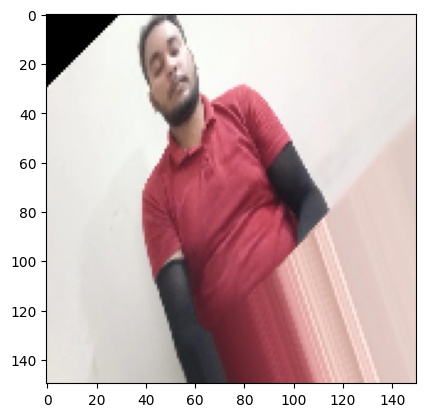

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Loaded image: Dawood-sheared_image-2.jpg


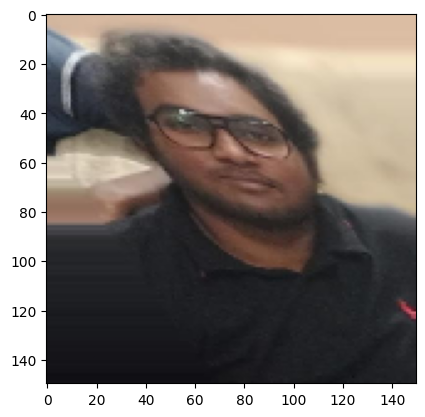

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Loaded image: Dawood-flipped_horizontal_vertical_image-6.jpg


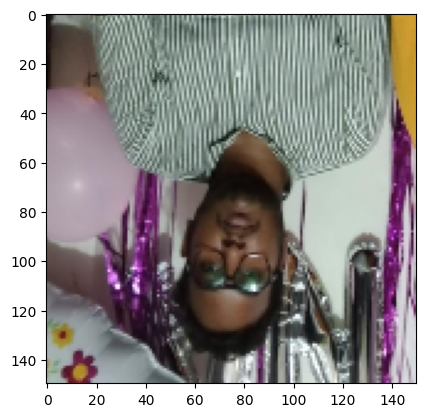

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Loaded image: Dawood-flipped_vertical_image-7.jpg


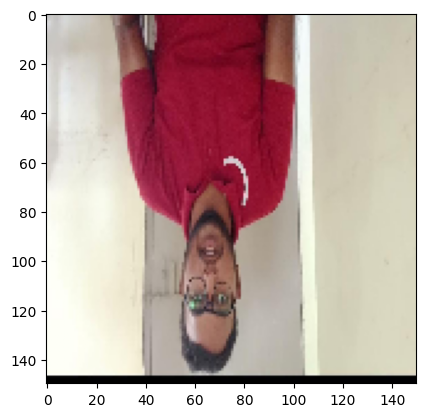

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Loaded image: Dawood-120-4.jpg


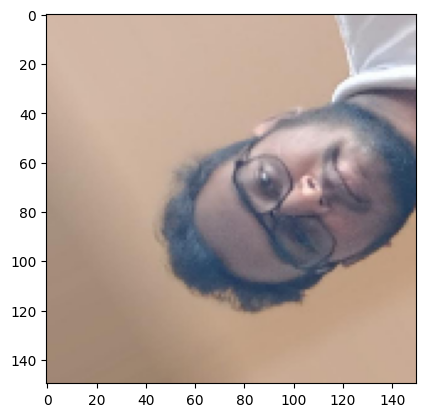

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Loaded image: Dawood-240-1.jpg


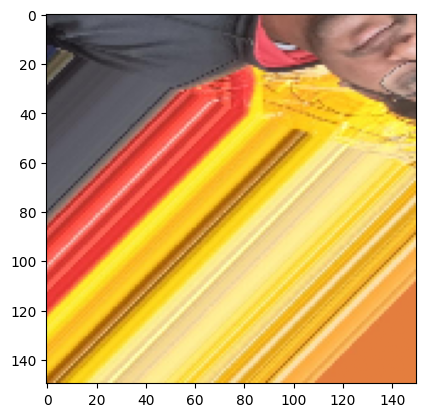

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Loaded image: Dawood-0-9.jpg


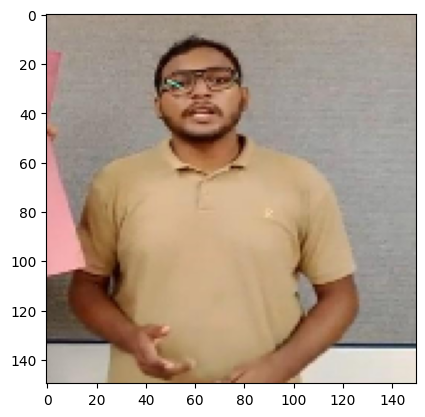

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Loaded image: Dawood-flipped_vertical_image-5.jpg


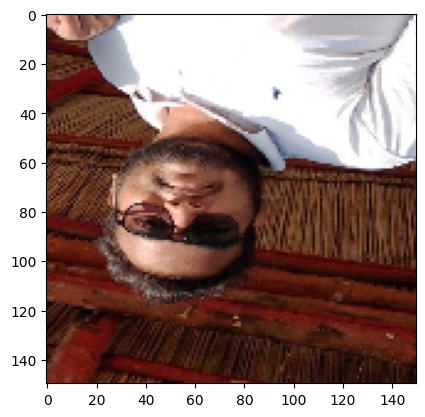

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Loaded image: Dawood-flipped_horizontal_vertical_image-5.jpg


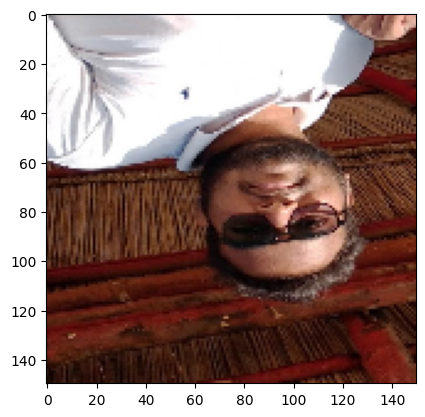

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Loaded image: Dawood-flipped_horizontal_vertical_image-2.jpg


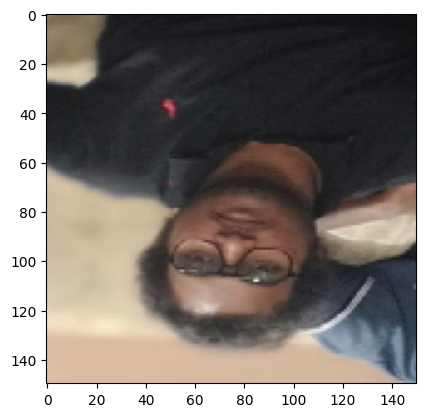

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Loaded image: Dawood-sheared_image-4.jpg


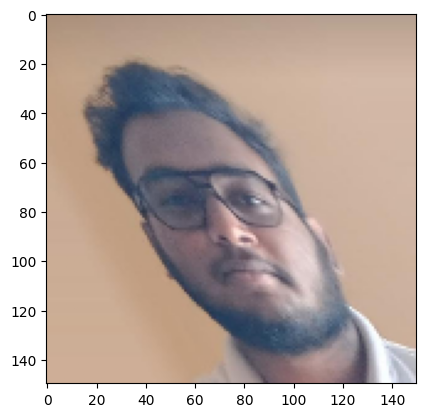

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Loaded image: Dawood-300-5.jpg


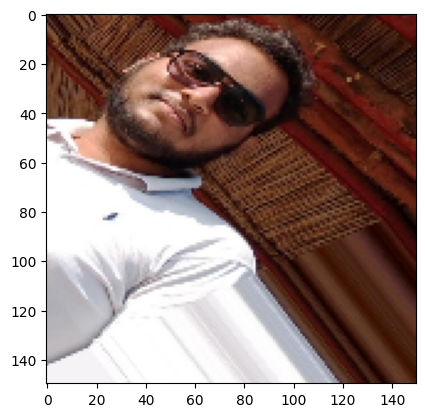

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Loaded image: Dawood-300-6.jpg


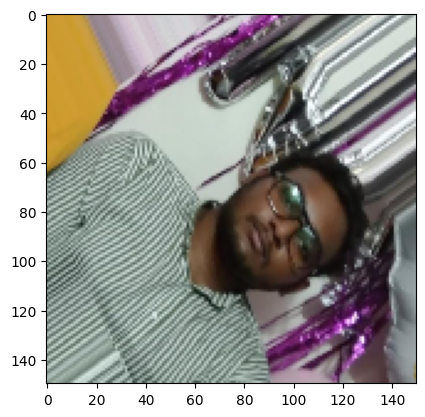

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Loaded image: Dawood-30-9.jpg


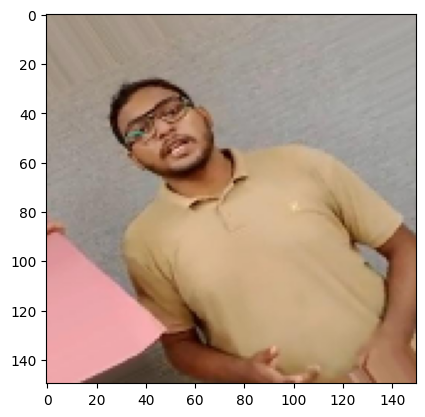

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Loaded image: Dawood-0-7.jpg


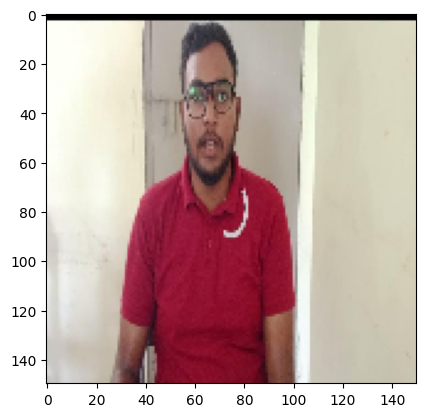

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Loaded image: Dawood-flipped_horizontal_image-5.jpg


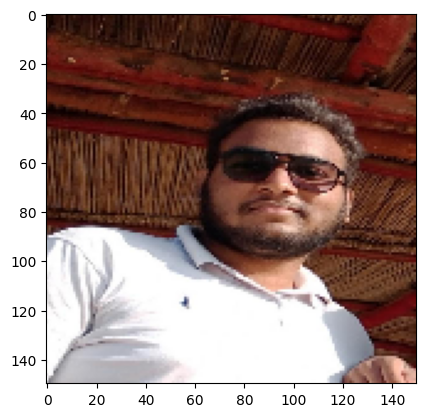

Dawood








In [33]:
# Directory containing the images
img_directory = '/content/drive/MyDrive/Colab Notebooks/working_directory2/test/dawood'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]
i=0
# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /=255.
    predlist.append(model.predict(img_tensor))
    print(f"Loaded image: {img_file}")
    plt.imshow(img_tensor[0])
    plt.show()
    if predlist[i] >= 0.50:                  #sigmoid activation function(range: 0 - 1)- 1st category: John - 0,
                                                                                 #2nd category: Dawood - 1

      print("John\n\n\n\n\n\n")

    else:
      print("Dawood\n\n\n\n\n\n")

    i+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Loaded image: John-30-8.jpg


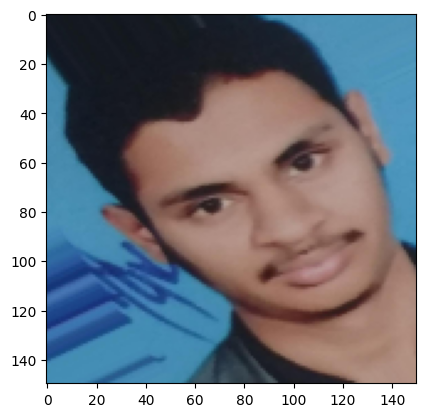

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Loaded image: John-sheared_image-2.jpg


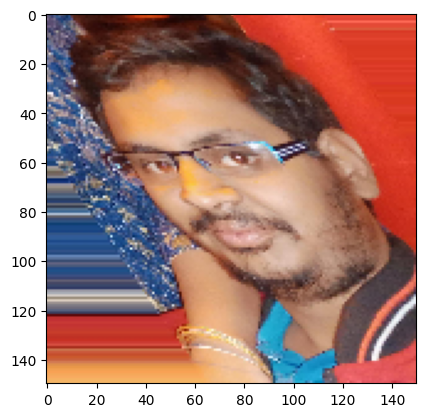

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Loaded image: John-flipped_horizontal_vertical_image-6.jpg


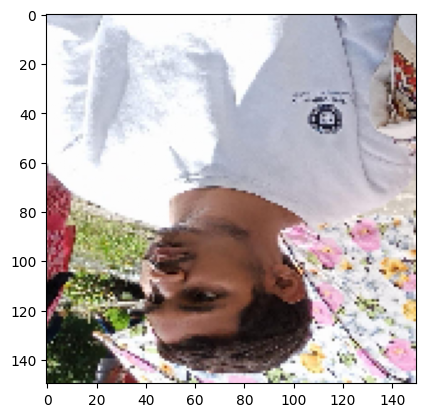

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Loaded image: John-flipped_vertical_image-7.jpg


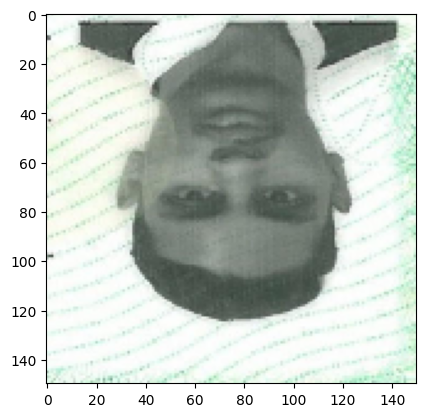

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Loaded image: John-120-4.jpg


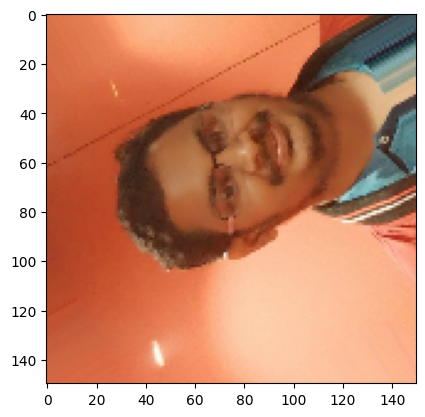

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Loaded image: John-240-1.jpg


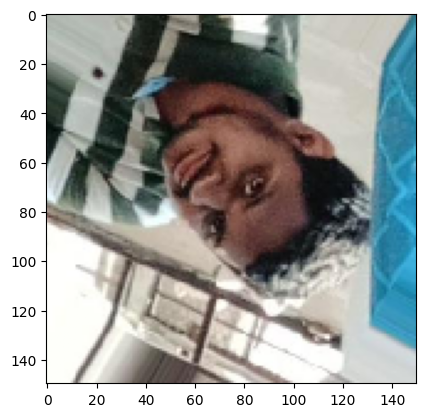

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Loaded image: John-0-9.jpg


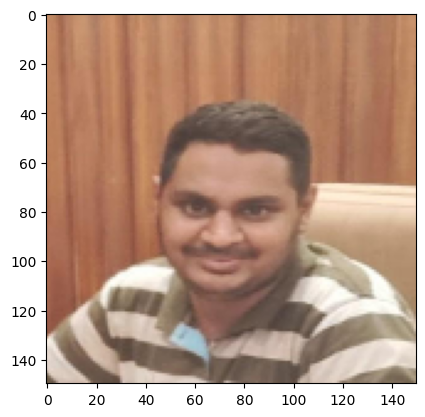

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Loaded image: John-flipped_vertical_image-5.jpg


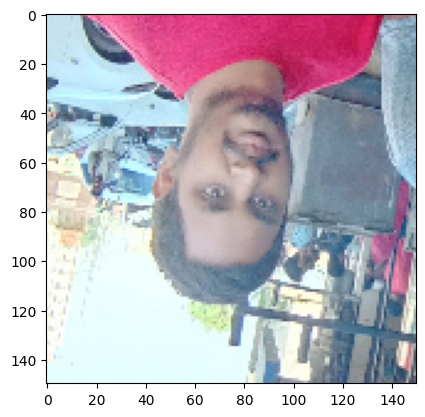

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Loaded image: John-flipped_horizontal_vertical_image-5.jpg


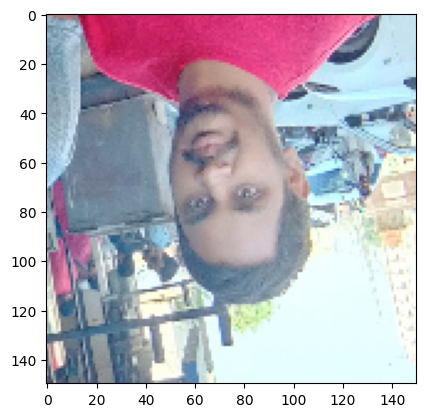

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Loaded image: John-flipped_horizontal_vertical_image-2.jpg


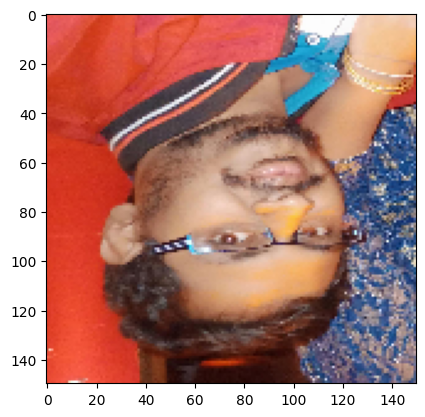

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Loaded image: John-sheared_image-4.jpg


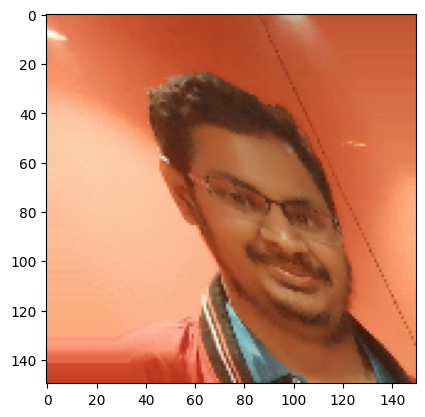

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Loaded image: John-300-5.jpg


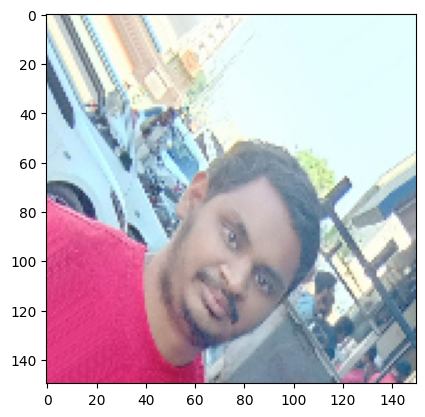

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Loaded image: John-300-6.jpg


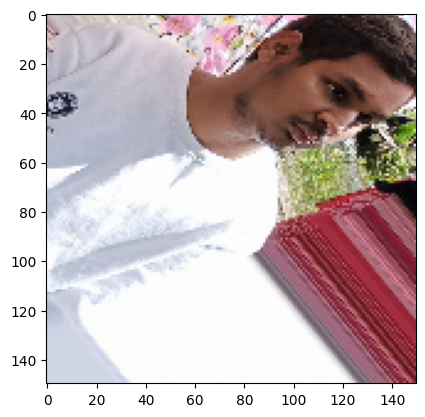

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Loaded image: John-30-9.jpg


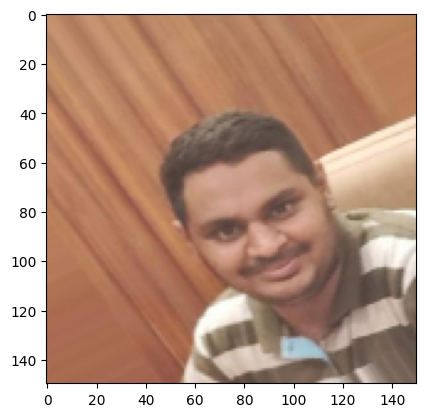

Dawood






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Loaded image: John-0-7.jpg


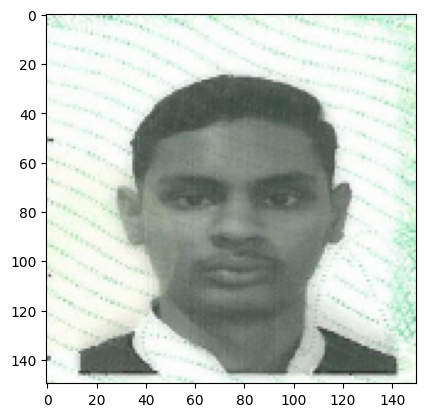

John






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Loaded image: John-flipped_horizontal_image-5.jpg


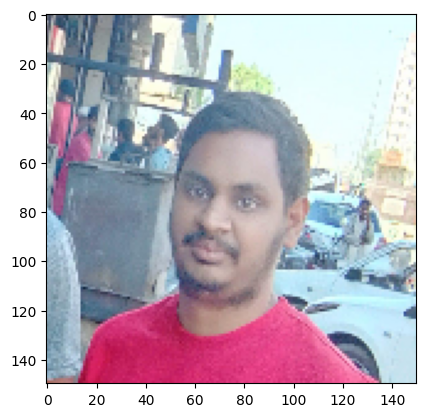

John








In [34]:
# Directory containing the images
img_directory = '/content/drive/MyDrive/Colab Notebooks/working_directory2/test/john'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]
predlist = []
i=0
# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /=255.
    predlist.append(model.predict(img_tensor))
    print(f"Loaded image: {img_file}")
    plt.imshow(img_tensor[0])
    plt.show()
    if predlist[i] >= 0.50:                  #sigmoid activation function(range: 0 - 1)- 1st category: John - 0,
                                                                                 #2nd category: Dawood - 1

      print("John\n\n\n\n\n\n")

    else:
      print("Dawood\n\n\n\n\n\n")

    i+=1
